# Suicides Exploratory Data Analysis (EDA) in India


## Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# importing dataset
data = pd.read_csv(r"C:\Users\Lenovo\Downloads\suicides(1).csv")

In [3]:
data.head()

,State,Year,Type_code,Type,Gender,Age_group,Total
0,A & N Islands,2001,Causes,Illness (Aids/STD),Female,0-14,0
1,A & N Islands,2001,Causes,Bankruptcy or Sudden change in Economic,Female,0-14,0
2,A & N Islands,2001,Causes,Cancellation/Non-Settlement of Marriage,Female,0-14,0
3,A & N Islands,2001,Causes,Physical Abuse (Rape/Incest Etc.),Female,0-14,0
4,A & N Islands,2001,Causes,Dowry Dispute,Female,0-14,0


In [4]:
data.shape

(237519, 7)

Checking data set for null values

In [5]:
data.isna().sum()

State        0
Year         0
Type_code    0
Type         0
Gender       0
Age_group    0
Total        0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237519 entries, 0 to 237518
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   State      237519 non-null  object
 1   Year       237519 non-null  int64 
 2   Type_code  237519 non-null  object
 3   Type       237519 non-null  object
 4   Gender     237519 non-null  object
 5   Age_group  237519 non-null  object
 6   Total      237519 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 12.7+ MB


### Q1 . Total number of people committed suicides every year?

Analytical data

In [8]:
bold_start = '\033[1m'
bold_end = '\033[0m'
print(bold_start,"Total suicides per each year is :",data.groupby("Year")['Total'].sum())

 Total suicides per each year is : Year
2001     976464
2002     993648
2003     997622
2004    1023137
2005    1025201
2006    1062991
2007    1103667
2008    1125082
2009    1144033
2010    1211322
2011    1219499
2012    1189068
Name: Total, dtype: int64


Visualization

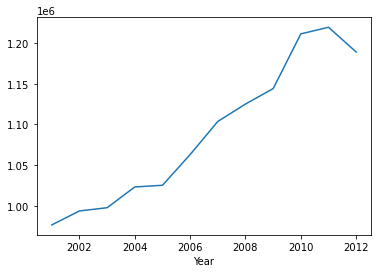

In [9]:
data.groupby("Year")['Total'].sum().plot(kind="line")

### Q2. Which states commited more suicides?

In [10]:
bold_start = '\033[1m'
bold_end = '\033[0m'
filter_state = pd.DataFrame(data.groupby(["State"])["Total"].sum()).reset_index()
filter_state
print(bold_start,"States with more suicide cases",bold_end,filter_state)

 States with more suicide cases                  State    Total
0       A & N Islands     8109
1      Andhra Pradesh   814059
2   Arunachal Pradesh     6633
3               Assam   172276
4               Bihar    46214
5          Chandigarh     5164
6        Chhattisgarh   302354
7        D & N Haveli     3430
8         Daman & Diu     1391
9          Delhi (Ut)    84272
10                Goa    17363
11            Gujarat   330858
12            Haryana   147176
13   Himachal Pradesh    26562
14    Jammu & Kashmir    14821
15          Jharkhand    49720
16          Karnataka   734825
17             Kerala   538946
18        Lakshadweep       50
19     Madhya Pradesh   451535
20        Maharashtra   901945
21            Manipur     2102
22          Meghalaya     5415
23            Mizoram     4154
24           Nagaland     1728
25             Odisha   267234
26         Puducherry    32144
27             Punjab    46350
28          Rajasthan   255134
29             Sikkim     9606
30    

In [11]:
filter_state = filter_state.drop([31,32,33],axis=0)

Visualization

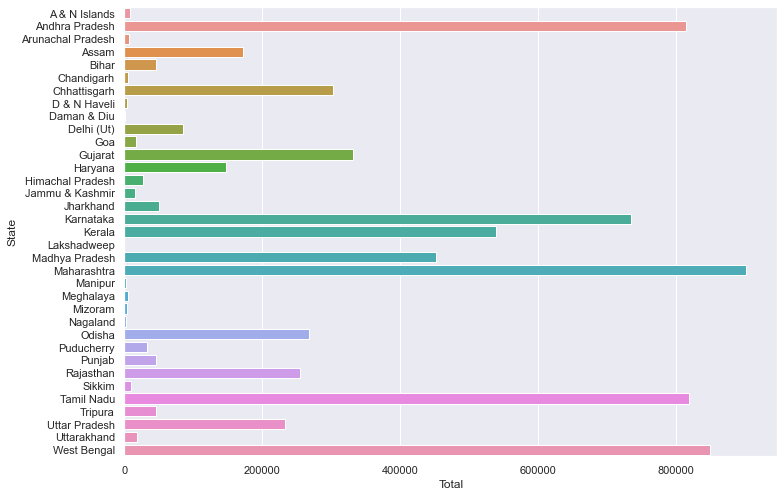

In [15]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(y = 'State', x = 'Total',data = filter_state, edgecolor = 'w')
plt.show()

In [13]:
 from wordcloud import WordCloud

Big Font in Wordcloud means higher count of suicides committed

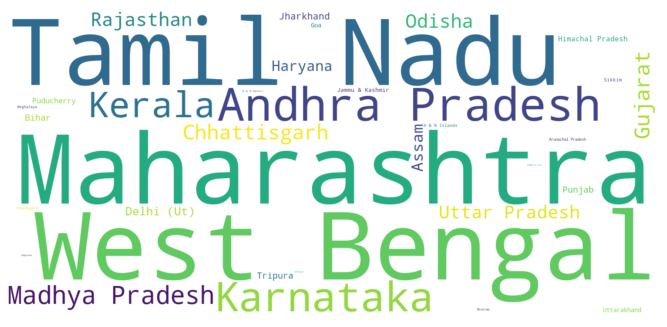

In [16]:
from wordcloud import WordCloud
count = {}
for x in filter_state["State"].values:
    count[x]=int(filter_state[filter_state["State"]==x].Total)


wordcloud = WordCloud(width=1500,height=720,background_color='white').generate_from_frequencies(count)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()



The highest no. of suicide cases occur in Maharashtra, West Bengal, and Andhra Pradesh.

### Q.3 What was the relationship status of the people who committed suicides?

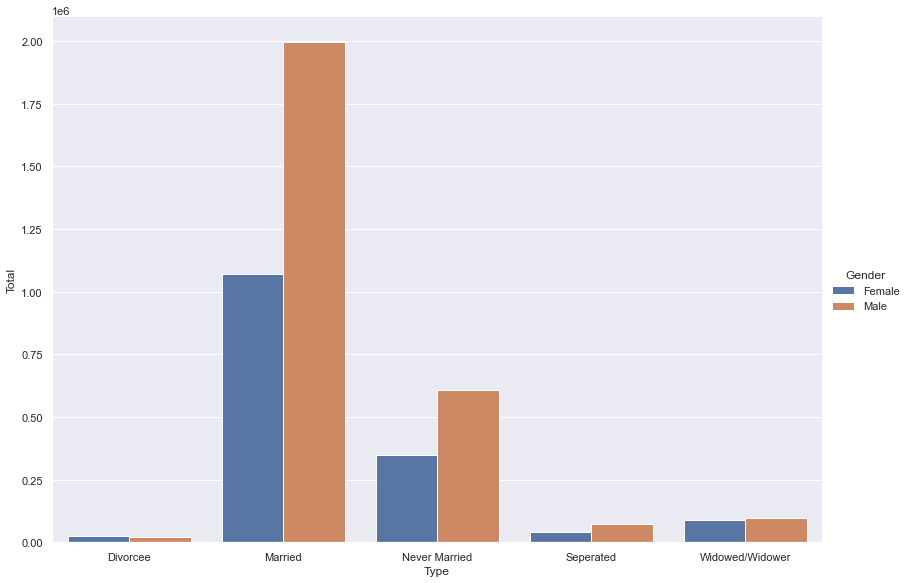

In [25]:
data_filter = data[data['Type_code']=='Social_Status'].groupby(['Type','Gender'])['Total'].sum().reset_index()

sns.catplot(x='Type',y='Total',hue='Gender',kind='bar',data=data_filter,height=8.27,aspect=11.7/8.27)

Males tend to commit more suicides compared to Females in India

## Q.4 What was the professionof the people who committed suicides?

Analytics

In [29]:
filter_prof = data[data['Type_code']=='Professional_Profile'].groupby(['Type','Gender'])['Total'].sum().reset_index()
filter_prof

,Type,Gender,Total
0,Farming/Agriculture Activity,Female,27300
1,Farming/Agriculture Activity,Male,170623
2,House Wife,Female,285243
3,House Wife,Male,0
4,Others (Please Specify),Female,111191
5,Others (Please Specify),Male,357956
6,Professional Activity,Female,3617
7,Professional Activity,Male,35587
8,Public Sector Undertaking,Female,5530
9,Public Sector Undertaking,Male,25256


Visualization

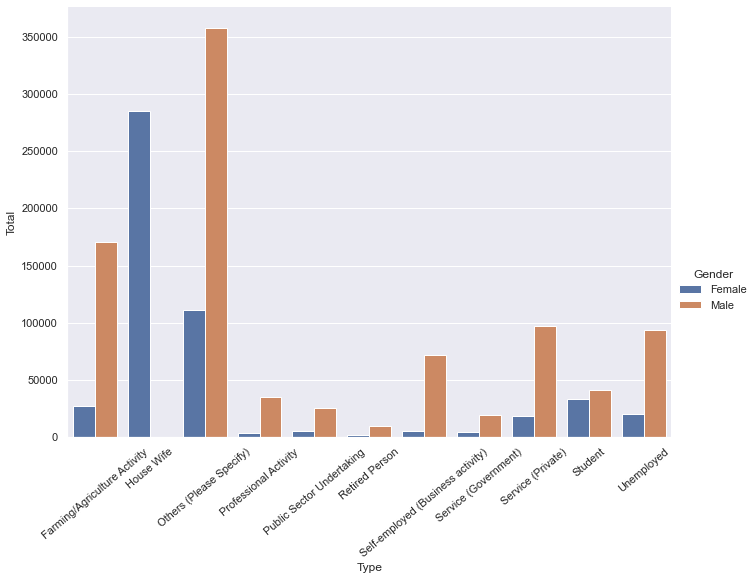

In [35]:
g=sns.catplot(x='Type',y='Total',hue='Gender',kind='bar',data=filter_prof,height=6.8,aspect=11.7/8.27)
g.set_xticklabels(rotation=40)

Male might commit more suicide compared to females in the future if this trend continues.

### Q5. Total Summary of Male Who Committed Suicides in India?

#USING PLACARD:

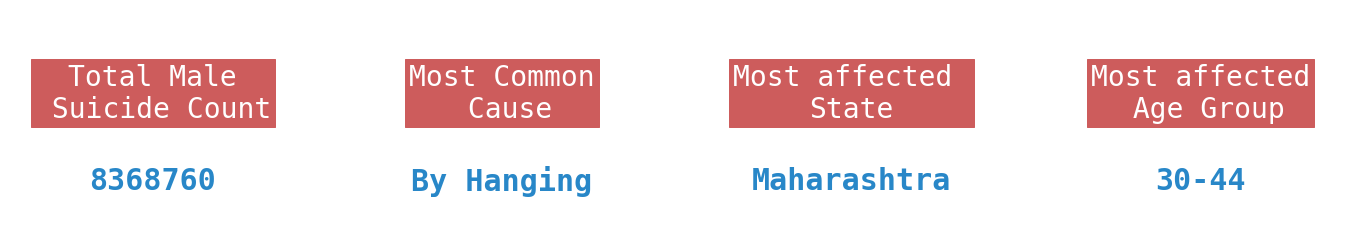

In [54]:
col = ['Total Male\n Suicide Count', 'Most Common\n Cause', 'Most affected \nState', 'Most affected\n Age Group',]

values = [data.groupby('Gender').sum()['Total']['Male'],'By Hanging','Maharashtra','30-44']

fig, axes = plt.subplots(1, 4, figsize=(24, 4))
axes = axes.flatten()
fig.set_facecolor('white')
for ind, col in enumerate(col):
    axes[ind].text(0.5, 0.6, col,ha='center', va='center',fontfamily='monospace', fontsize=28,color='white', backgroundcolor='indianred')
    axes[ind].text(0.5, 0.2, values[ind],ha='center', va='center',fontfamily='monospace', fontsize=30, fontweight='bold',color='#2887C8', backgroundcolor='white')
    axes[ind].set_axis_off()


### Q.6 Total Summary of Female Who Committed Suicides in India?


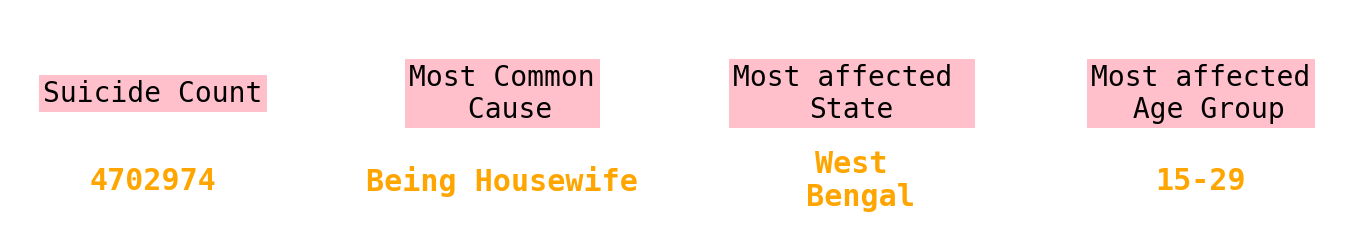

In [55]:
col = ['Suicide Count', 'Most Common\n Cause', 'Most affected \nState', 'Most affected\n Age Group',]

values = [data.groupby('Gender').sum()['Total']['Female'],'Being Housewife','West\n Bengal','15-29']

fig, axes = plt.subplots(1, 4, figsize=(24, 4))
axes = axes.flatten()
fig.set_facecolor('white')

for ind, col in enumerate(col):
    axes[ind].text(0.5, 0.6, col, 
            ha='center', va='center',
            fontfamily='monospace', fontsize=28,
            color='black', backgroundcolor='pink')

    axes[ind].text(0.5, 0.2, values[ind], 
            ha='center', va='center',
            fontfamily='monospace', fontsize=30, fontweight='bold',
            color='Orange', backgroundcolor='white')
    
    axes[ind].set_axis_off()

### Q.7 Total Summary of People Who Committed Suicides in India?

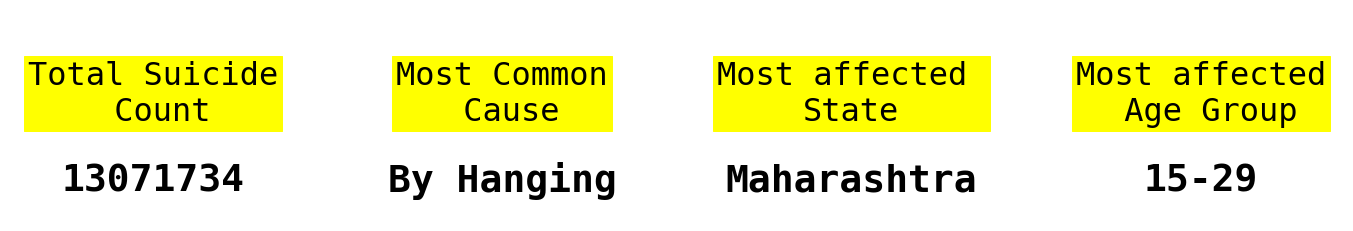

In [57]:
col = ['Total Suicide\n Count', 'Most Common\n Cause', 'Most affected \nState', 'Most affected\n Age Group',]

values = [data.groupby('Gender').sum()['Total']['Female'] + data.groupby('Gender').sum()['Total']['Male'],'By Hanging','Maharashtra','15-29']
color_val = ['lightblue','lightblue','lightblue','lightblue']

fig, axes = plt.subplots(1, 4, figsize=(24, 4))
axes = axes.flatten()
fig.set_facecolor('white')

for ind, col in enumerate(col):
    axes[ind].text(0.5, 0.6, col, 
            ha='center', va='center',
            fontfamily='monospace', fontsize=32,
            color='black', backgroundcolor='yellow')

    axes[ind].text(0.5, 0.2, values[ind], 
            ha='center', va='center',
            fontfamily='monospace', fontsize=38, fontweight='bold',
            color='black', backgroundcolor='white')
    
    axes[ind].set_axis_off()

#END